In [1]:
#defining libraries
import keras 
from keras.models import Sequential
from keras.utils import to_categorical
from keras import models
from keras.layers import *
from keras import layers
from keras import optimizers
from keras.preprocessing.image import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import shutil

In [2]:
# defining data directories
original_data_set="data/"
train_dir="data/train/"
test_dir="data/test/"

In [3]:
# image size assignment
img = load_img(train_dir + "malignant/5.jpg")
x= img_to_array(img)

In [4]:
# class lenght assignmetnt
classname= glob(train_dir + "/*")
numberofclass = len(classname)
# defining batch sizes
batch_sizes=[32,64]

In [12]:
# creating basic network
# includes 25 epoch
# binary crossentropy
# dense 512 - 1 
# no dropout
# no data augmantation
def basic_model_creator(epoch_number,file_name,batch_size):
    model_25ep=models.Sequential()
    model_25ep.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(224,224,3)))
    model_25ep.add(layers.MaxPooling2D((2,2)))
    model_25ep.add(layers.Conv2D(64,(3,3),activation="relu"))
    model_25ep.add(layers.MaxPooling2D((2,2)))
    model_25ep.add(layers.Conv2D(128,(3,3), activation= "relu"))
    model_25ep.add(layers.MaxPooling2D((2,2)))
    model_25ep.add(layers.Conv2D(128,(3,3), activation= "relu"))
    model_25ep.add(layers.MaxPooling2D((2,2)))
    
    model_25ep.add(layers.Flatten())
    model_25ep.add(layers.Dense(512, activation="relu"))
    model_25ep.add(layers.Dense(1, activation="sigmoid"))
    
    model_25ep.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=["acc"])
    
    # image rescaling and model fitting
    train_datagen=ImageDataGenerator(rescale=1./255)
    test_datagen=ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=batch_size,
                                                        class_mode="binary")

    test_generator = test_datagen.flow_from_directory(test_dir,
                                                      target_size=(224,224),
                                                      batch_size=batch_size,
                                                      class_mode="binary")
    # model fitting
    hist=model_25ep.fit_generator(train_generator,
                                  steps_per_epoch=2600//batch_size,
                                  epochs=epoch_number,
                                  validation_data=test_generator,
                                  validation_steps=600//batch_size)
    # model visualization with pylot
    plt.plot(hist.history["acc"],label="acc")
    plt.plot(hist.history["val_acc"],label="val_acc")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()

    plt.figure()

    plt.plot(hist.history["loss"],label="loss")
    plt.plot(hist.history["val_loss"],label="val_loss")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()
    
    #model saving
    model_25ep.save(file_name)

In [13]:
file_names=["32.h5","64.h5"]

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/25
81/81 [==============================] - 83s 1s/step - loss: 0.9512 - acc: 0.5558 - val_loss: 0.6776 - val_acc: 0.5434
Epoch 2/25
81/81 [==============================] - 83s 1s/step - loss: 0.6454 - acc: 0.6382 - val_loss: 0.5348 - val_acc: 0.7118
Epoch 3/25
81/81 [==============================] - 85s 1s/step - loss: 0.5334 - acc: 0.7353 - val_loss: 0.5949 - val_acc: 0.6545
Epoch 4/25
81/81 [==============================] - 79s 970ms/step - loss: 0.5666 - acc: 0.7513 - val_loss: 0.4850 - val_acc: 0.7483
Epoch 5/25
81/81 [==============================] - 78s 968ms/step - loss: 0.4994 - acc: 0.7664 - val_loss: 0.3939 - val_acc: 0.8021
Epoch 6/25
81/81 [==============================] - 79s 978ms/step - loss: 0.4213 - acc: 0.7870 - val_loss: 0.3674 - val_acc: 0.8090
Epoch 7/25
81/81 [==============================] - 79s 974ms/step - loss: 0.4385 - acc: 0.7960 - val_loss: 0.3894 - val_acc: 0.

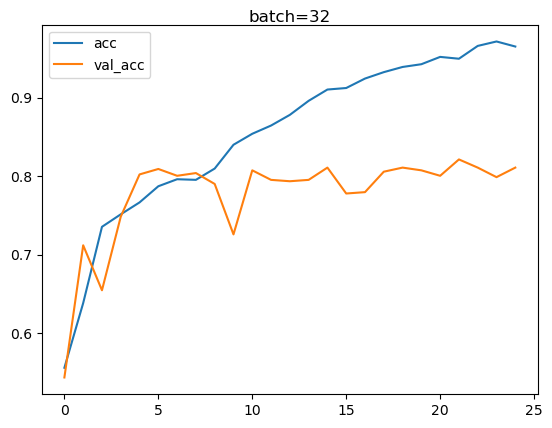

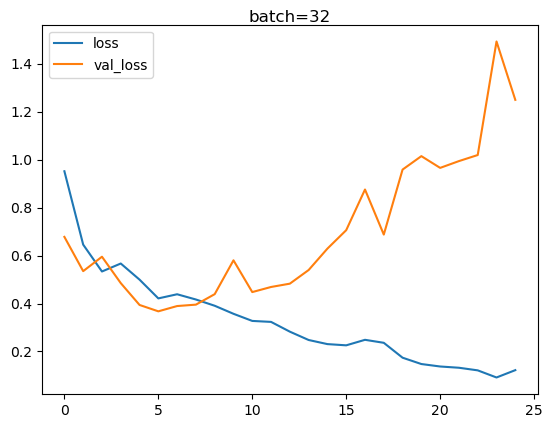

learning done

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/25
40/40 [==============================] - 80s 2s/step - loss: 1.3808 - acc: 0.6130 - val_loss: 0.6469 - val_acc: 0.5712
Epoch 2/25
40/40 [==============================] - 79s 2s/step - loss: 0.7413 - acc: 0.6608 - val_loss: 0.5295 - val_acc: 0.6875
Epoch 3/25
40/40 [==============================] - 80s 2s/step - loss: 0.5649 - acc: 0.7141 - val_loss: 0.5761 - val_acc: 0.6771
Epoch 4/25
40/40 [==============================] - 79s 2s/step - loss: 0.6406 - acc: 0.7373 - val_loss: 0.4882 - val_acc: 0.7292
Epoch 5/25
40/40 [==============================] - 81s 2s/step - loss: 0.4837 - acc: 0.7676 - val_loss: 0.4262 - val_acc: 0.7795
Epoch 6/25
40/40 [==============================] - 78s 2s/step - loss: 0.4996 - acc: 0.7533 - val_loss: 0.4411 - val_acc: 0.7778
Epoch 7/25
40/40 [==============================] - 79s 2s/step - loss: 0.4639 - acc: 0.7776 - val_loss: 0.4201 - val_acc:

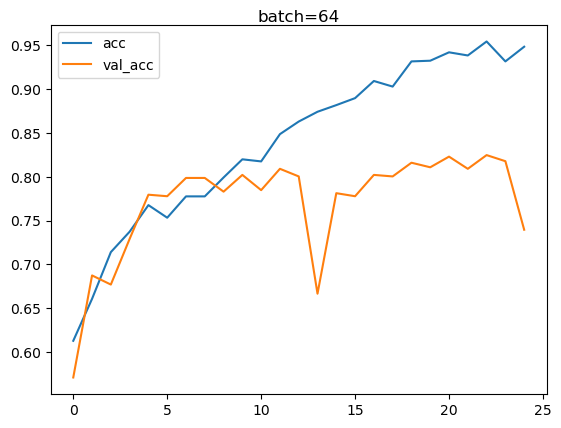

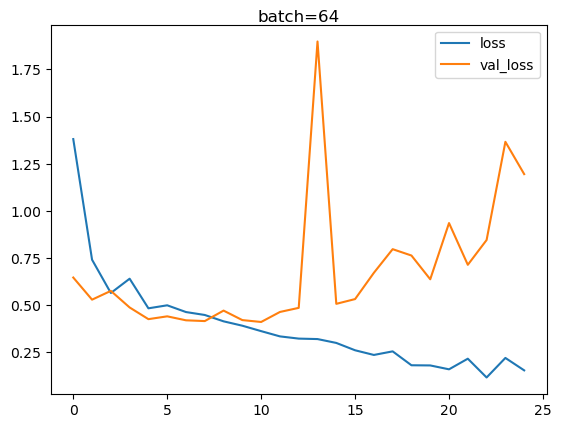

learning done



In [14]:
# running basic learning
# includes 25 epoch
# binary crossentropy
# dense 512 - 1 
for i in range(len(batch_sizes)):
    # model fitting not only 32 batch but also 64 batch
    basic_model_creator(25,file_names[i],batch_sizes[i])
    print("learning done")
    print()

In [ ]:
# create basic learning
# includes 50 epoch
# binary crossentropy
# dense 512 - 1 
file_names_50ep=["32_50ep.h5","64_50ep.h5"]
for i in range(len(batch_sizes)):
    basic_model_creator(50,file_names_50ep[i],batch_sizes[i])
    print("learning done")
    print()

In [15]:
# creating dropout network
# binary crossentropy
# dense 512 - 1 , 4 hidden layer
# data augmentation

def dropout_model_creator(epoch_number,drop_file_name,batch_size):
    
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(224,224,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=["acc"])

    # image rescaling and model fitting
    drop_train_datagen=ImageDataGenerator(rescale=1./255)
    drop_test_datagen=ImageDataGenerator(rescale=1./255)
    
    
    drop_train_generator = drop_train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=batch_size,
                                                        class_mode="binary")

    drop_test_generator = drop_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(224,224),
                                                      batch_size=batch_size,
                                                      class_mode="binary")
    
    # model fitting
    drop_hist=model.fit_generator(drop_train_generator,
                                  steps_per_epoch=2600//batch_size,
                                  epochs=epoch_number,
                                  validation_data=drop_test_generator,
                                  validation_steps=600//batch_size)
    
    # model visualization
    plt.plot(drop_hist.history["acc"],label="acc")
    plt.plot(drop_hist.history["val_acc"],label="val_acc")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()

    plt.figure()

    plt.plot(drop_hist.history["loss"],label="loss")
    plt.plot(drop_hist.history["val_loss"],label="val_loss")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()
    
    #model saving
    model.save(drop_file_name)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/40
81/81 [==============================] - 84s 1s/step - loss: 0.8464 - acc: 0.5771 - val_loss: 0.8624 - val_acc: 0.4688
Epoch 2/40
81/81 [==============================] - 83s 1s/step - loss: 0.6161 - acc: 0.6934 - val_loss: 0.5141 - val_acc: 0.7622
Epoch 3/40
81/81 [==============================] - 83s 1s/step - loss: 0.5482 - acc: 0.7520 - val_loss: 0.5399 - val_acc: 0.7951
Epoch 4/40
81/81 [==============================] - 84s 1s/step - loss: 0.4893 - acc: 0.7610 - val_loss: 0.5067 - val_acc: 0.7500
Epoch 5/40
81/81 [==============================] - 83s 1s/step - loss: 0.4730 - acc: 0.7746 - val_loss: 0.4199 - val_acc: 0.7951
Epoch 6/40
81/81 [==============================] - 83s 1s/step - loss: 0.4359 - acc: 0.7995 - val_loss: 0.5451 - val_acc: 0.6701
Epoch 7/40
81/81 [==============================] - 83s 1s/step - loss: 0.4139 - acc: 0.7998 - val_loss: 0.4111 - val_acc: 0.7934
Epoch 8

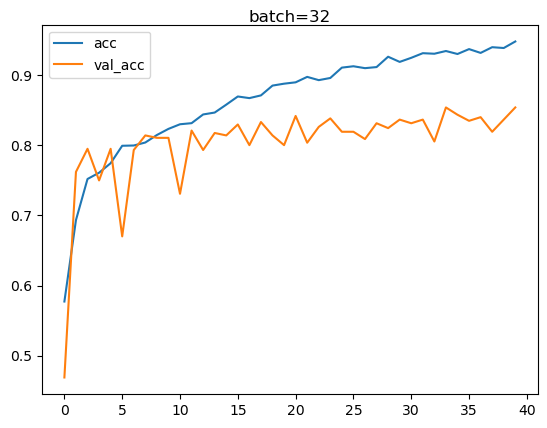

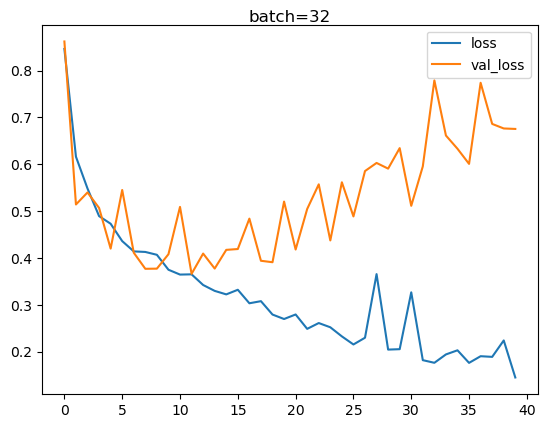

learning done

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/40
40/40 [==============================] - 80s 2s/step - loss: 2.0086 - acc: 0.5321 - val_loss: 0.6828 - val_acc: 0.5573
Epoch 2/40
40/40 [==============================] - 79s 2s/step - loss: 0.7332 - acc: 0.5341 - val_loss: 0.6954 - val_acc: 0.4566
Epoch 3/40
40/40 [==============================] - 81s 2s/step - loss: 0.7197 - acc: 0.5484 - val_loss: 0.6775 - val_acc: 0.6649
Epoch 4/40
40/40 [==============================] - 79s 2s/step - loss: 0.6996 - acc: 0.6341 - val_loss: 0.6797 - val_acc: 0.5955
Epoch 5/40
40/40 [==============================] - 79s 2s/step - loss: 0.6061 - acc: 0.6999 - val_loss: 0.4916 - val_acc: 0.7535
Epoch 6/40
40/40 [==============================] - 79s 2s/step - loss: 0.5456 - acc: 0.7326 - val_loss: 0.6087 - val_acc: 0.7309
Epoch 7/40
40/40 [==============================] - 80s 2s/step - loss: 0.5202 - acc: 0.7461 - val_loss: 0.6052 - val_acc:

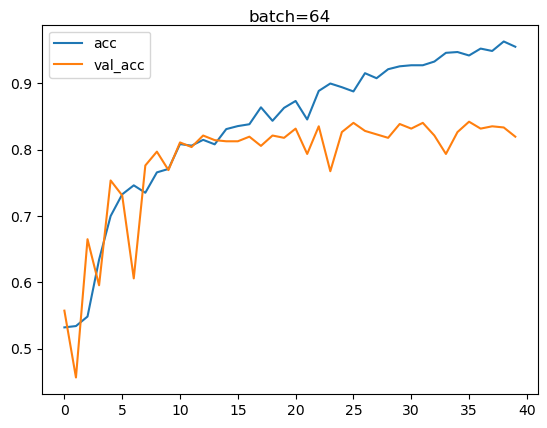

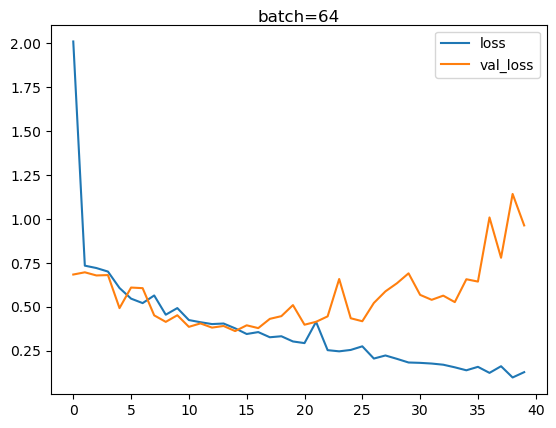

learning done



In [16]:
# create dropout learning
# includes 40 epoch
# binary crossentropy
# dense 512 - 1 
# defining file names
drop_file_names=["32_drop.h5","64_drop.h5"]
# model fitting not only 32 batch but also 64 batch
for i in range(len(batch_sizes)):
    dropout_model_creator(40,drop_file_names[i],batch_sizes[i])
    print("learning done")
    print()
    

In [17]:
# creating advanced augmentation and dropout model

def advanced_model_creator(epoch_number,adv_file_name,batch_size):
    
    advanced_model = models.Sequential()
    advanced_model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(224,224,3)))
    advanced_model.add(layers.MaxPooling2D((2,2)))
    advanced_model.add(layers.Conv2D(64,(3,3),activation="relu"))
    advanced_model.add(layers.MaxPooling2D((2,2)))
    advanced_model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    advanced_model.add(layers.MaxPooling2D((2,2)))
    advanced_model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    advanced_model.add(layers.MaxPooling2D((2,2)))
    advanced_model.add(layers.Flatten())
    
    advanced_model.add(layers.Dropout(0.5))
    
    advanced_model.add(layers.Dense(512, activation="relu"))
    advanced_model.add(layers.Dense(1, activation="sigmoid"))
    
    advanced_model.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=["acc"])
    
    
    # image rescaling and model fitting
    # using data augmentation
    adv_train_datagen=ImageDataGenerator(rescale=1./255,
                                         width_shift_range=0.3,
                                         height_shift_range=0.3,
                                         shear_range=0.2,
                                         zoom_range=0.3,
                                         horizontal_flip=True)
    
    adv_test_datagen=ImageDataGenerator(rescale=1./255)
    
    adv_train_generator=adv_train_datagen.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size=batch_size,
                                        class_mode="binary")
    
    adv_test_generator = adv_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(224,224),
                                                      batch_size=batch_size,
                                                      class_mode="binary")
    
    # model fitting
    adv_hist=advanced_model.fit_generator(adv_train_generator,
                                  steps_per_epoch=2600//batch_size,
                                  epochs=epoch_number,
                                  validation_data=adv_test_generator,
                                  validation_steps=600//batch_size)
    
    # model visualization
    plt.plot(adv_hist.history["acc"],label="acc")
    plt.plot(adv_hist.history["val_acc"],label="val_acc")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()

    plt.figure()

    plt.plot(adv_hist.history["loss"],label="loss")
    plt.plot(adv_hist.history["val_loss"],label="val_loss")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()
    
    #model saving
    advanced_model.save(adv_file_name)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/40
81/81 [==============================] - 95s 1s/step - loss: 0.8561 - acc: 0.5433 - val_loss: 0.6658 - val_acc: 0.6007
Epoch 2/40
81/81 [==============================] - 94s 1s/step - loss: 0.9251 - acc: 0.6475 - val_loss: 0.5585 - val_acc: 0.6753
Epoch 3/40
81/81 [==============================] - 96s 1s/step - loss: 0.6844 - acc: 0.6798 - val_loss: 0.5256 - val_acc: 0.7622
Epoch 4/40
81/81 [==============================] - 93s 1s/step - loss: 0.5309 - acc: 0.7478 - val_loss: 0.5066 - val_acc: 0.7674
Epoch 5/40
81/81 [==============================] - 94s 1s/step - loss: 0.5483 - acc: 0.7287 - val_loss: 0.4489 - val_acc: 0.7743
Epoch 6/40
81/81 [==============================] - 93s 1s/step - loss: 0.4915 - acc: 0.7637 - val_loss: 0.4361 - val_acc: 0.7847
Epoch 7/40
81/81 [==============================] - 93s 1s/step - loss: 0.4915 - acc: 0.7629 - val_loss: 0.3980 - val_acc: 0.7865
Epoch 8

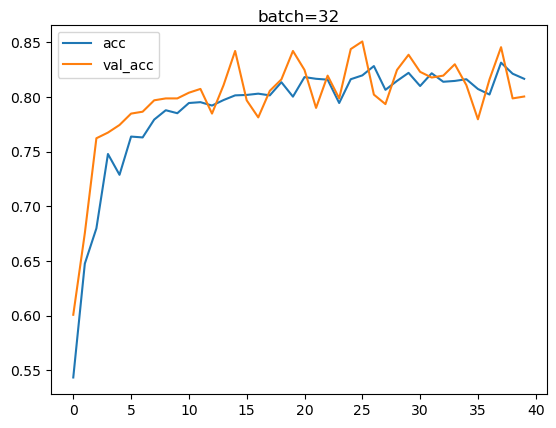

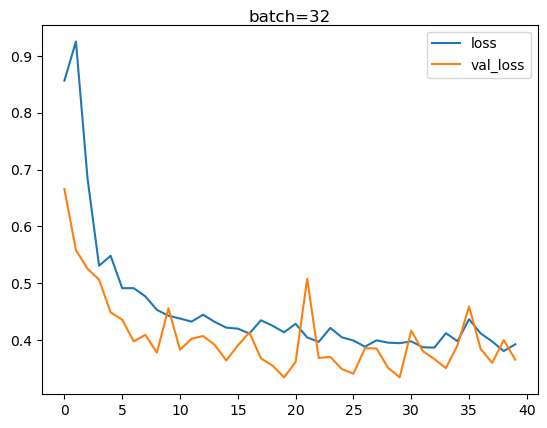

learning done

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/40
40/40 [==============================] - 88s 2s/step - loss: 1.5575 - acc: 0.5405 - val_loss: 0.6618 - val_acc: 0.5556
Epoch 2/40
40/40 [==============================] - 88s 2s/step - loss: 0.7464 - acc: 0.5480 - val_loss: 0.6802 - val_acc: 0.5434
Epoch 3/40
40/40 [==============================] - 91s 2s/step - loss: 0.6969 - acc: 0.6058 - val_loss: 0.8021 - val_acc: 0.5625
Epoch 4/40
40/40 [==============================] - 89s 2s/step - loss: 0.7274 - acc: 0.6776 - val_loss: 0.6674 - val_acc: 0.6736
Epoch 5/40
40/40 [==============================] - 88s 2s/step - loss: 0.5954 - acc: 0.6923 - val_loss: 0.5155 - val_acc: 0.7188
Epoch 6/40
40/40 [==============================] - 86s 2s/step - loss: 0.5997 - acc: 0.7039 - val_loss: 0.5023 - val_acc: 0.7014
Epoch 7/40
40/40 [==============================] - 87s 2s/step - loss: 0.5610 - acc: 0.7274 - val_loss: 0.5602 - val_acc:

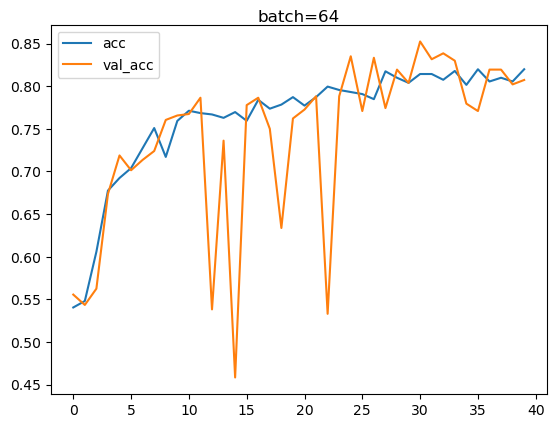

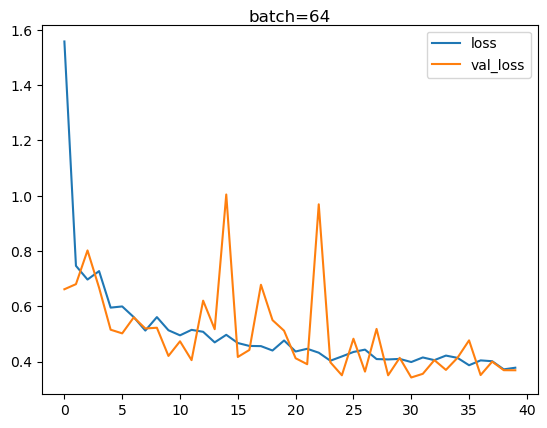

learning done



In [18]:
# create advanced learning
# includes 50 epoch
# includes data augmentation
# binary crossentropy
# dense 512 - 1 
# defining file names

adv_file_names=["32_adv.h5","64_adv.h5"]
# model fitting not only 32 batch but also 64 batch
for i in range(len(batch_sizes)):
    advanced_model_creator(40,adv_file_names[i],batch_sizes[i])
    print("learning done")
    print()

In [8]:
# creating much more complicated network
# binary crossentropy
# dense 512 - 1

def extreme_model_creator(epoch_number,adv_file_name,batch_size):
    
    extreme_model = models.Sequential()
    extreme_model.add(layers.Conv2D(16,(3,3), activation="relu",input_shape=(224,224,3)))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    extreme_model.add(layers.Conv2D(32,(3,3),activation="relu"))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    extreme_model.add(layers.Conv2D(64,(3,3), activation= "relu"))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    extreme_model.add(layers.Conv2D(64,(3,3), activation= "relu"))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    extreme_model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    extreme_model.add(layers.Conv2D(128,(3,3), activation= "relu"))
    extreme_model.add(layers.MaxPooling2D((2,2)))
    
    
    
    extreme_model.add(layers.Flatten())
    
    
    extreme_model.add(layers.Dense(512, activation="relu"))
    extreme_model.add(layers.Dropout(0.5))
    extreme_model.add(layers.Dense(1, activation="sigmoid"))
    
    extreme_model.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=["acc"])
    
    
    # image rescaling and model fitting
    # using data augmentation
    xtr_train_datagen=ImageDataGenerator(rescale=1./255,
                                         width_shift_range=0.3,
                                         height_shift_range=0.3,
                                         shear_range=0.2,
                                         zoom_range=0.3,
                                         horizontal_flip=True)
    
    xtr_test_datagen=ImageDataGenerator(rescale=1./255)
    
    xtr_train_generator=xtr_train_datagen.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size=batch_size,
                                        class_mode="binary")
    
    xtr_test_generator = xtr_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(224,224),
                                                      batch_size=batch_size,
                                                      class_mode="binary")

    
    # model fitting
    xtr_hist=extreme_model.fit_generator(xtr_train_generator,
                                  steps_per_epoch=2600//batch_size,
                                  epochs=epoch_number,
                                  validation_data=xtr_test_generator,
                                  validation_steps=600//batch_size)

    # model visualization
    plt.plot(xtr_hist.history["acc"],label="acc")
    plt.plot(xtr_hist.history["val_acc"],label="val_acc")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()

    plt.figure()

    plt.plot(xtr_hist.history["loss"],label="loss")
    plt.plot(xtr_hist.history["val_loss"],label="val_loss")
    plt.title('batch='+str(batch_size),pad=-40)
    plt.legend()
    plt.show()
    
    #model saving
    extreme_model.save(adv_file_name)

In [9]:
# defining extreme batch size as 32
xtr_batch_size=[32]

starting 1. learning
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/60
81/81 [==============================] - 55s 677ms/step - loss: 0.6882 - acc: 0.5371 - val_loss: 0.6629 - val_acc: 0.5990
Epoch 2/60
81/81 [==============================] - 56s 692ms/step - loss: 0.6421 - acc: 0.6681 - val_loss: 0.6443 - val_acc: 0.5712
Epoch 3/60
81/81 [==============================] - 56s 696ms/step - loss: 0.5751 - acc: 0.7073 - val_loss: 0.7588 - val_acc: 0.4653
Epoch 4/60
81/81 [==============================] - 57s 706ms/step - loss: 0.5403 - acc: 0.7073 - val_loss: 0.6481 - val_acc: 0.5469
Epoch 5/60
81/81 [==============================] - 57s 702ms/step - loss: 0.5089 - acc: 0.7450 - val_loss: 0.4409 - val_acc: 0.7691
Epoch 6/60
81/81 [==============================] - 55s 684ms/step - loss: 0.4772 - acc: 0.7653 - val_loss: 0.4286 - val_acc: 0.7778
Epoch 7/60
81/81 [==============================] - 55s 684ms/step - loss: 0.4715 - acc: 0.7610 - 

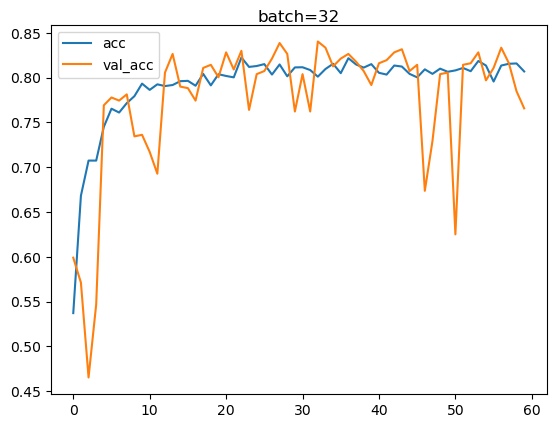

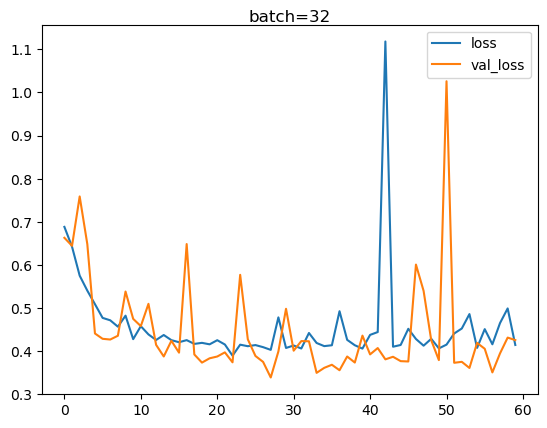

learning done



In [10]:
# running extreme learning
# includes 100 epoch
# includes data augmentation
# binary crossentropy
# dense 1024 - 1 
# defining file names

xtr_file_names=["32_xtr.h5"]

for i in range(len(xtr_batch_size)):
    print("starting {}. learning".format(i+1))
    extreme_model_creator(60,xtr_file_names[i],xtr_batch_size[i])
    print("learning done")
    print()